1. Common classification metrics are accuracy, precision, recall, f1 score (balance of the two). 

    $$ recall = TP/(TP+FN)$$ 
    $$ precision = TP/(TP+FP)$$ 
    $$ f1 = 2*precision*recall/(precision+recall) $$

    Recall is also sensitivity in statistics where sensitivity vs (1-specificity) shows the ROC curve. specificity = TN/(TN+FP)

    Other metrics can be useful as well:

2. Kolomogorov-Smirnov

3. Gain and lift charts/plots

## Gain & Lift

"Gain at a given decile level is the ratio of cumulative number of targets (events) up to that decile to the total number of targets (events) in the entire data set."

E.g., % of targets (events) covered at a given decile level. For example,  80% of targets covered in top 20% of data based on model. In the case of propensity to buy model, we can say we can identify and target 80% of customers who are likely to buy the product by just sending email to 20% of total customers.

"Lift measures how much better one can expect to do with the predictive model comparing without a model. It is the ratio of gain % to the random expectation % at a given decile level. The random expectation at the xth decile is x%."

E.g., The Cum Lift of 4.03 for top two deciles, means that when selecting 20% of the records based on the model, one can expect 4.03 times the total number of targets (events) found by randomly selecting 20%-of-file without a model.

Referenfed from https://www.listendata.com/2014/08/excel-template-gain-and-lift-charts.html.

## Visualization using scikitplot

/Users/rdu/anaconda/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


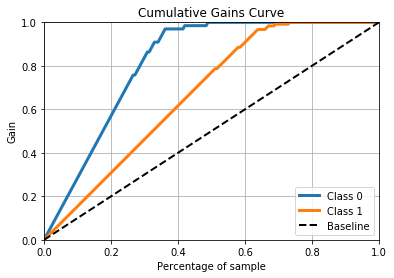

In [13]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
test_size=0.33)
nb = GaussianNB()
nb.fit(X_train, y_train)
predicted_probas = nb.predict_proba(X_test)

# The magic happens here
import matplotlib.pyplot as plt
import scikitplot as skplt
skplt.metrics.plot_cumulative_gain(y_test, predicted_probas)
plt.show()

/Users/rdu/anaconda/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


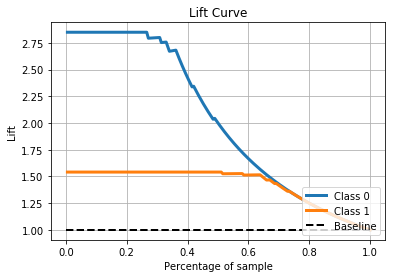

In [17]:
skplt.metrics.plot_lift_curve(y_test, predicted_probas)
plt.show()

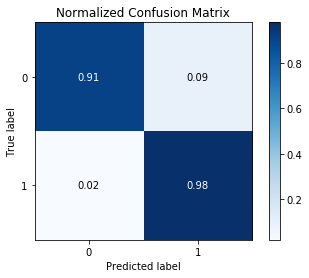

In [14]:
predictions = nb.predict(X_test)
skplt.metrics.plot_confusion_matrix(y_test, predictions, normalize=True)
plt.show()

/Users/rdu/anaconda/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function plot_precision_recall_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_precision_recall instead.
  warnings.warn(msg, category=DeprecationWarning)


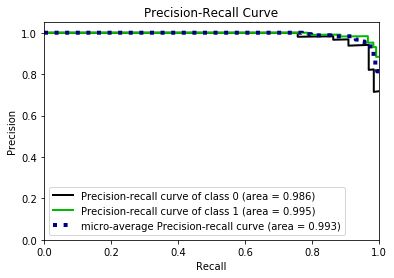

In [15]:
skplt.metrics.plot_precision_recall_curve(y_test, predicted_probas)
plt.show()